# Miremos todos los datos

Una vez más ... ya sabes como empezamos, ¿no?

In [1]:
import pandas as pd
import matplotlib.pyplot as pl
from Significancia import *
%matplotlib inline

Y ahora, algo que ya sabemos hacer. Leamos los ficheros con todos los datos y los valores que hay en sus columnas. Y esta vez, leamos no solo el valor de ** Theta Cuadrado **, sino también el de ** hadronness ** que son los valores que hay en la columna que se llama ** had **

In [2]:
#Leemos los ficheros y les damos un nombre
cygX1_ON= pd.read_csv('data/EvtList_ON_CygX3_All.txt', sep=' ')
cygX1_OFF= pd.read_csv('data/EvtList_OFF_CygX3_All.txt', sep=' ')

#Vemos cuantas filas estamos cargando en los datos
len(cygX1_ON)

84597

In [3]:
#Vemos cómo son los datos del ON, por ejemplo
cygX1_ON.head()

,had,theta2
0,1.000,0.149
1,0.126,0.178
2,1.000,0.011
3,0.970,0.020
4,0.995,0.317


Ves la columna llamada **had**?  Ahí está la información del hadroness de cada evento detectado por el telescopio.
Algunos tienen **hadroness alto** (1.000, 0.970), son probablemente protones o nucleos ligeros. Otros tienen **hadroness bajo**, eso son probablemente los gammas que buscamos.

Con más de ochenta mil filas, lo mejor que podemos hacer es representar los datos con un ** Theta Plot **. Pero no queremos todas las filas, solo nos quedaremos con aquella que tengan **hadroness menor que 0.20**

1. Definimos la variable **had_cut = 0.20**
2. Seleccionamos únicamente las filas que tiene **hadroness < had_cut** y las guardamos con el nombre **CygX1_ON_cut**:
> **cygX1_ON_cut = cygX1_ON[cygX1_ON['had'] < had_cut]**  
> CygX1_ON_cut tiene menos filas que CygX1_ON, pero el mismo número de columnas. Sabrías comporbarlo?
3. Hago el ** Theta Plot ** igual que sin el corte en hadronnes pero ahora usamos **CygX1_ON_cut.theta2**
4. Y lo mismo para el OFF, así la comparación tiene sentido.


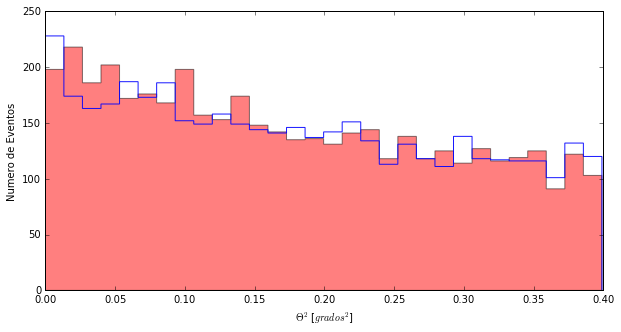

-0.48949852089254597

In [3]:
# 1 Definimos la variable had_cut
had_cut = 0.20
# 2 Seleccionamos los datos: hadroness menor que 0.20
cygX1_ON_cut = cygX1_ON[cygX1_ON['had'] < had_cut]
cygX1_OFF_cut = cygX1_OFF[cygX1_OFF['had'] < had_cut]
# 3 Hacemos el Theta Plot
pl.figure(1, figsize=(10, 5), facecolor='w', edgecolor='k')
Noff, ThetasOff, _ = pl.hist(cygX1_OFF_cut.theta2, bins=30, histtype='stepfilled', color='red', alpha=0.5, normed=False)
Non, ThetasOn, _ = pl.hist(cygX1_ON_cut.theta2, bins=30, histtype='step', color = 'blue',alpha=0.9, normed=False)
pl.xlabel('$\Theta^2$ [$grados^2$]')
pl.ylabel('Numero de Eventos')
pl.show()
CalcularSignificancia(Non, Noff)

Cierto, he hecho algo diferente. Delante de la instrucción : 
> "pl.hist(CutHad.compressed(), bins=30, histtype='step', color = 'blue',alpha=0.9, normed=False)"

he puesto:

> Non, ThetasOn, _ =

Esto me permite guardar el número de eventos que hay en cada barra del gráfico en Non y el valor de ** Theta Cuadrado ** que representa esa barra en ThetasOn.

Y entonces uso Non y Noff para calcular la significancia y ...

Todo el gozo en un  pozo, ya se ve en el gráfico. Con todos los datos no hay nada y la significancia es -0.49 sigmas.

---------

¿Y que pasa si cambiamos el corte en hadronness? De hecho si en lugar de 0.20 corto en 0.06 recupero las sigmas que tenía.

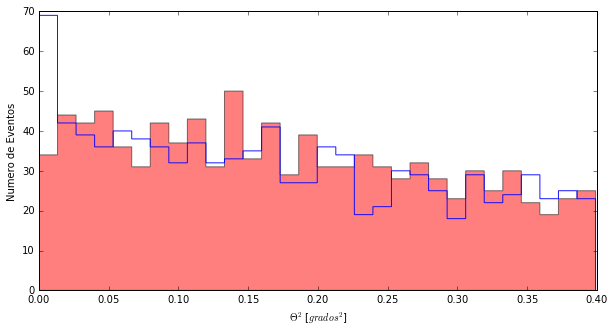

2.4003967925959162

In [4]:
# 1 Definimos la variable had_cut
had_cut = 0.06
# 2 Seleccionamos los datos: hadroness menor que 0.06
cygX1_ON_cut = cygX1_ON[cygX1_ON['had'] < had_cut]
cygX1_OFF_cut = cygX1_OFF[cygX1_OFF['had'] < had_cut]
# 3 Hacemos el Theta Plot
pl.figure(1, figsize=(10, 5), facecolor='w', edgecolor='k')
Noff, ThetasOff, _ = pl.hist(cygX1_OFF_cut.theta2, bins=30, histtype='stepfilled', color='red', alpha=0.5, normed=False)
Non, ThetasOn, _ = pl.hist(cygX1_ON_cut.theta2, bins=30, histtype='step', color = 'blue',alpha=0.9, normed=False)
pl.xlabel('$\Theta^2$ [$grados^2$]')
pl.ylabel('Numero de Eventos')
pl.show()
CalcularSignificancia(Non, Noff)

** "Trial factors", "Trial factors", "Trial factors", "Trial factors", "Trial factors" **

Sí, sí ... aquí está mi voz de la conciencia que de tanto trabajar en un entorno internacional ya me habla en inglés. No vale buscar en tus datos que corte es el mejor.

Si hacemos eso con las observaciones que simulamos antes, también conseguiremos valores de ** Significancia ** mayores y esas observaciones simuladas siguen siendo por construcción fluctuaciones estadísticas.

-------

Lo que si puedo hacer es buscar el mejor corte por ejemplo en los datos del primer día y después usar ese corte (aunque estrictamente hablando entonces no debería usar los datos del primer día en el análisis final, pero bueno ... )

¿Qué me saldrá como mejor corte para los datos del primer día?

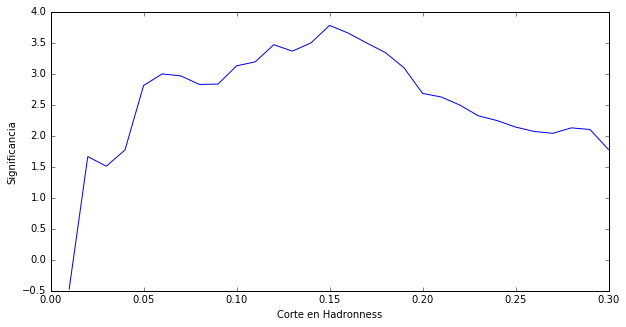

In [7]:
from EntrenarCorteHadronness import *
MejorCorte()

El primer gráfico es la superposición de todos los ** Theta Plot ** para diferentes valores del corte en hadronness, no es muy relevante. El segundo, muestra como cambia la Significancia para diferentes valores del corte.
Pues no era 0.20 el mejor sino 0.15. ¿A ver qué sale con todos los datos si cortamos en hadronness 0.15?

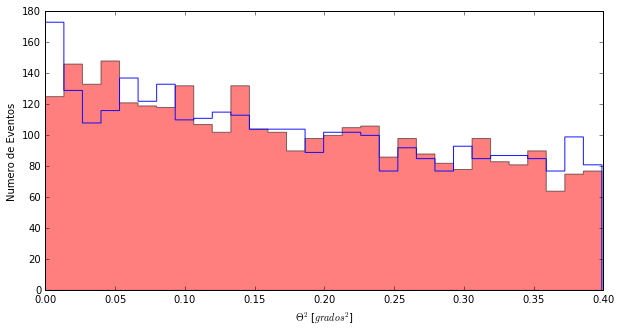

1.2950435787475061

In [6]:
# 1 Definimos la variable had_cut
had_cut = 0.15
# 2 Seleccionamos los datos: hadroness menor que 0.15
cygX1_ON_cut = cygX1_ON[cygX1_ON['had'] < had_cut]
cygX1_OFF_cut = cygX1_OFF[cygX1_OFF['had'] < had_cut]
# 3 Hacemos el Theta Plot
pl.figure(1, figsize=(10, 5), facecolor='w', edgecolor='k')
Noff, ThetasOff, _ = pl.hist(cygX1_OFF_cut.theta2, bins=30, histtype='stepfilled', color='red', alpha=0.5, normed=False)
Non, ThetasOn, _ = pl.hist(cygX1_ON_cut.theta2, bins=30, histtype='step', color = 'blue',alpha=0.9, normed=False)
pl.xlabel('$\Theta^2$ [$grados^2$]')
pl.ylabel('Numero de Eventos')
pl.show()
CalcularSignificancia(Non, Noff)

Nada, no hay nada. Lo del primer día o fue una fluctuación estadísitica o algo que solo duró ese día. Nunca lo sabremos y quedará en la historia como una fluctuación.